No handles with labels found to put in legend.


optimal j: 4
bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.224 | true win_rate: 0.25
bandit3 estimate win-rate: 0.443 | true win_rate: 0.5
bandit4 estimate win-rate: 0.752 | true win_rate: 0.75
bandit5 estimate win-rate: 1.0 | true win_rate: 1

total reward: 9486.0
overall win-rate: 0.9486
explore count: 995
exploit count: 9005
optimal selection count: 9196


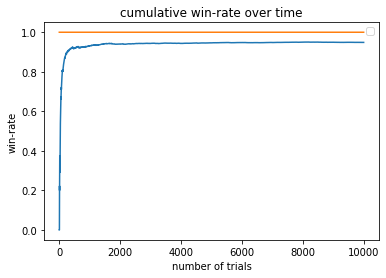

In [74]:
import matplotlib.pyplot as plt
import numpy as np

class Bandit:
  def __init__(self, p):
    self.p = p # the winning rate
    self.p_estimate = 0. # estimation of the winning rate, intialized to 0
    self.N = 0. # number of samples collected

  def pull(self):
    # draw a random probability p and check if won according to the winning rate
    return np.random.random() < self.p

  def update(self, x):
    # increment numbers of samples collected
    self.N += 1.
    # calculate the new p hat from the previous p hat and the newly obtained value
    self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

def run_experiment(bandits_probs_list, epsilon, N):
  # create a list of bandit objects according to their probabilities of win rate
  bandits = [Bandit(p) for p in bandits_probs_list]
  
  # initialize variables
  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0

  # print out the true optimal bandit index
  optimal_j = np.argmax([b.p for b in bandits])
  print('optimal j:', optimal_j)

  for i in range(NUM_TRIALS):
    # use epsilon_greedy to select the next bandit
    if np.random.random() < epsilon:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])
    
    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit selected
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x
    bandits[j].update(x)     
  
  # print mean estimates for each bandit
  for i, b in enumerate(bandits):
    print(f'bandit{i + 1} estimate win-rate: {round(b.p_estimate, 3)} | true win_rate: {b.p}')

  # print total reward
  print()
  print('total reward:', rewards.sum())
  print('overall win-rate:', rewards.sum() / NUM_TRIALS)
  print('explore count:', num_times_explored)
  print('exploit count:', num_times_exploited)
  print('optimal selection count:', num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS) * np.max(bandits_probs_list))
  plt.title('cumulative win-rate over time')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

if __name__ == '__main__':
  # simulate a multi-armed bandit problem with 5 machines with win-rates 0, 0.25, 0.5, 0.75 and 1
  # default random selection to happen 10% of the time, thus selecting epsilon of 0.1
  # default to 10000 trials
  run_experiment([0, 0.25, 0.5, 0.75, 1], 0.1, 10000)
